In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# folder_path = r'C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2\StrategicThinkingCA2\05-13_12-2023_11-15_12-2023'

# # Initialize an empty list to store DataFrames
# dataframes = []

# # Loop through all files in the folder
# for file_name in os.listdir(folder_path):
#     if file_name.endswith('.csv'):
#         # Construct the full file path
#         file_path = os.path.join(folder_path, file_name)
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)
#         # Append the DataFrame to the list
#         dataframes.append(df)

# # Concatenating all the DataFrames in the list into one
# merged_df = pd.concat(dataframes, ignore_index=True)

# Saving the merged DataFrame to a new CSV file
# output_file_path = r'C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2 - GitLab\ca2stratthinking\merged_dataset.csv'
# merged_df.to_csv(output_file_path, index=False)

# print(f"The merged dataset has been saved to {output_file_path}")

In [3]:
df= pd.read_csv("merged_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       2153 non-null   object
 1   Source        2153 non-null   object
 2   Destination   2153 non-null   object
 3   Duration      2153 non-null   object
 4   Total stops   2153 non-null   object
 5   Price         2153 non-null   object
 6   Date          2153 non-null   object
 7   Date scraped  2151 non-null   object
dtypes: object(8)
memory usage: 135.8+ KB


In [5]:
df.describe(include='all')

,Airline,Source,Destination,Duration,Total stops,Price,Date,Date scraped
count,2153,2153,2153,2153,2153,2153,2153,2151
unique,72,4,4,182,4,412,5,6
top,Iberia,DUB,DUB,2h 35m,1 stop,€75,14/12/2023,11/12/2023
freq,352,1071,1082,145,1425,40,481,477


In [6]:
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Date,Date scraped
0,"Transavia, Vueling",DUB,IBZ,17h 10m,1 stop,€91,11/12/2023,05/12/2023
1,"Aer Lingus, Vueling",DUB,IBZ,6h 40m,1 stop,€304,11/12/2023,05/12/2023
2,"Aer Lingus, Vueling",DUB,IBZ,5h 40m,1 stop,€347,11/12/2023,05/12/2023
3,Multiple Airlines,DUB,IBZ,7h 35m,2 stops,€236,11/12/2023,05/12/2023
4,"Transavia France, Vueling",DUB,IBZ,17h 10m,1 stop,€103,11/12/2023,05/12/2023


In [7]:
df['Airline'].value_counts()

Iberia                          352
British Airways                 284
Vueling                         272
Aer Lingus                      142
Aer Lingus, Vueling             129
                               ... 
Transavia France, Air Europa      1
CitizenPlane, Aer Lingus          1
Transavia France, easyJet         1
TAP AIR PORTUGAL, Iberia          1
Luxair, Binter Canarias           1
Name: Airline, Length: 72, dtype: int64

In [8]:
df['Source'].value_counts()

DUB    1071
MAD     384
IBZ     349
TFN     349
Name: Source, dtype: int64

In [9]:
df['Total stops'].value_counts()

1 stop     1425
direct      419
2 stops     294
3 stops      15
Name: Total stops, dtype: int64

In [10]:
# Replace 'direct' with 0 in 'Total stops' and convert to int, handling NaN values
df['Total stops'] = df['Total stops'].replace('direct', '0').str.extract('(\d+)')[0].fillna(0).astype(int)

# Remove the '€' sign from the 'Price' column and convert to integer, handling NaN and empty strings
df['Price'] = df['Price'].replace({'€': '', ',': '', ' ': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

# Convert the 'Duration' column to minutes
def duration_to_minutes(duration_str):
    if pd.isnull(duration_str):
        return 0
    parts = duration_str.split(' ')
    minutes = 0
    for part in parts:
        if 'h' in part:
            minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
    return minutes

df['Duration'] = df['Duration'].apply(duration_to_minutes)

# Display the first few rows to confirm the changes
df.head()

,Airline,Source,Destination,Duration,Total stops,Price,Date,Date scraped
0,"Transavia, Vueling",DUB,IBZ,1030,1,91,11/12/2023,05/12/2023
1,"Aer Lingus, Vueling",DUB,IBZ,400,1,304,11/12/2023,05/12/2023
2,"Aer Lingus, Vueling",DUB,IBZ,340,1,347,11/12/2023,05/12/2023
3,Multiple Airlines,DUB,IBZ,455,2,236,11/12/2023,05/12/2023
4,"Transavia France, Vueling",DUB,IBZ,1030,1,103,11/12/2023,05/12/2023


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       2153 non-null   object
 1   Source        2153 non-null   object
 2   Destination   2153 non-null   object
 3   Duration      2171 non-null   int64 
 4   Total stops   2171 non-null   int32 
 5   Price         2171 non-null   int32 
 6   Date          2153 non-null   object
 7   Date scraped  2151 non-null   object
dtypes: int32(2), int64(1), object(5)
memory usage: 118.9+ KB


In [12]:
df.isnull().sum()

Airline         18
Source          18
Destination     18
Duration         0
Total stops      0
Price            0
Date            18
Date scraped    20
dtype: int64

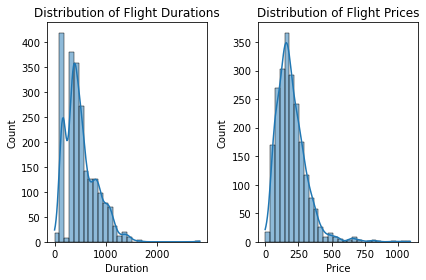

In [13]:
plt.subplot(1, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Flight Durations')
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.tight_layout()
plt.show()

## Outliers

The box plots show that there are outliers in both 'Duration' and 'Price'. The outliers in 'Duration' are particularly extreme, which could suggest either very long flights or errors in data entry.
The outliers in 'Price' are less extreme but indicate that some tickets are significantly more expensive than others.

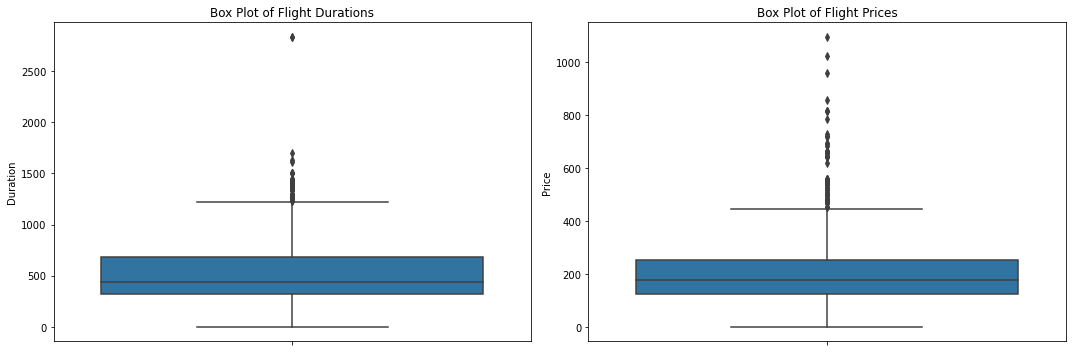

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Duration'])
plt.title('Box Plot of Flight Durations')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Flight Prices')
plt.tight_layout()
plt.show()

## Correlation

There appears to be a slight positive correlation between the number of stops and the price of a flight. This suggests that flights with more stops may be slightly more expensive.
Additionally, there is a weak positive correlation between the duration of a flight and its price, indicating that longer flights may tend to be more expensive.
As expected, there is a moderate positive correlation between the duration of a flight and the number of stops, since more stops generally result in longer flight durations.

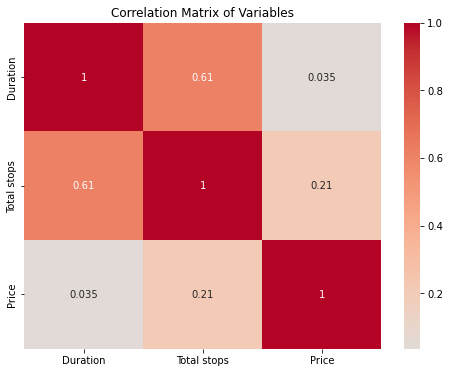

In [15]:
desc_stats = df.describe()
correlation_matrix=df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Variables')
plt.show()

In [16]:
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage

Airline         0.829111
Source          0.829111
Destination     0.829111
Duration        0.000000
Total stops     0.000000
Price           0.000000
Date            0.829111
Date scraped    0.921234
dtype: float64

## Data transformation

In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date scraped'] = pd.to_datetime(df['Date scraped'], errors='coerce')

In [18]:
# One-hot encoding of the 'Airline' column
one_hot_encoded_data = pd.get_dummies(df, columns=['Airline','Source','Destination'])

# Displaying the first few rows of the newly encoded DataFrame
one_hot_encoded_data.head()

,Duration,Total stops,Price,Date,Date scraped,Airline_Aer Lingus,"Airline_Aer Lingus, Air Europa","Airline_Aer Lingus, Binter Canarias","Airline_Aer Lingus, British Airways","Airline_Aer Lingus, Iberia",...,"Airline_Vueling, Transavia","Airline_Vueling, Transavia France",Source_DUB,Source_IBZ,Source_MAD,Source_TFN,Destination_DUB,Destination_IBZ,Destination_MAD,Destination_TFN
0,1030,1,91,2023-11-12,2023-05-12,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,400,1,304,2023-11-12,2023-05-12,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,340,1,347,2023-11-12,2023-05-12,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,455,2,236,2023-11-12,2023-05-12,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1030,1,103,2023-11-12,2023-05-12,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [19]:
# Dropping rows with any missing values
df = df.dropna()

# Checking the shape of the new DataFrame to see how many rows were dropped
print("Original DataFrame shape:", df.shape)
print("New DataFrame shape:", df.shape)

Original DataFrame shape: (2143, 8)
New DataFrame shape: (2143, 8)


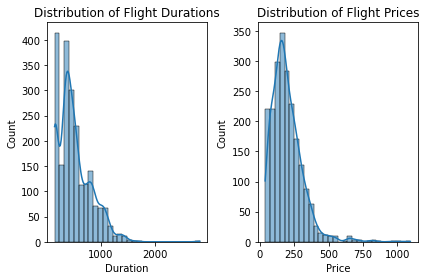

In [20]:
plt.subplot(1, 2, 1)
sns.histplot(df['Duration'], bins=30, kde=True)
plt.title('Distribution of Flight Durations')
plt.subplot(1, 2, 2)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.tight_layout()
plt.show()

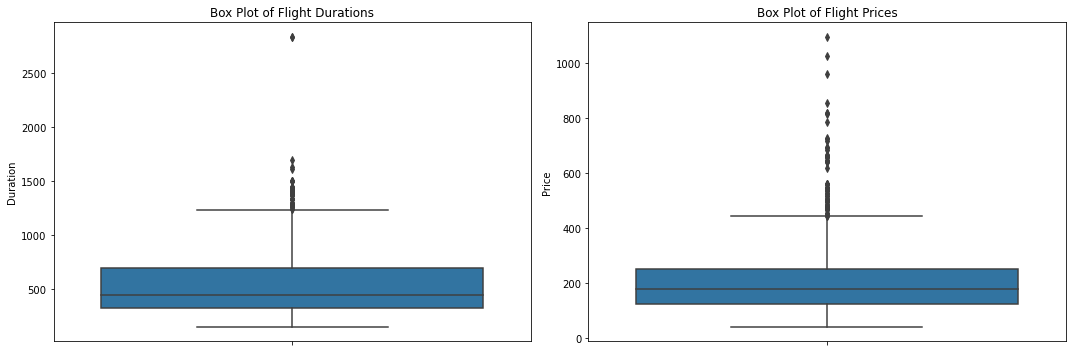

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Duration'])
plt.title('Box Plot of Flight Durations')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Box Plot of Flight Prices')
plt.tight_layout()
plt.show()

## EDA - PRICE

In [22]:
mean_price = df['Price'].mean()
print("Mean price:", mean_price)

Mean price: 198.33644423705087


In [23]:
# Grouping by day and calculate mean price
average_price_by_day = df.groupby(df['Date'].dt.date)['Price'].mean()

# Finding the day(s) with the lowest average price
cheapest_days = average_price_by_day.idxmin()
cheapest_price = average_price_by_day.min()

print("Cheapest days to fly:", cheapest_days)
print("Price on the cheapest day:", cheapest_price)

Cheapest days to fly: 2023-12-13
Price on the cheapest day: 177.61505376344087


In [24]:
# Group by 'Airline', 'Source', 'Destination', and 'Date', then calculate the mean price
average_price_details = df.groupby(['Airline', 'Source', 'Destination', 'Date'])['Price'].mean()

# Sorting the results to find the cheapest combinations
cheapest_combinations = average_price_details.nsmallest(10)

print(cheapest_combinations)

Airline         Source  Destination  Date      
Iberia Express  MAD     DUB          2023-12-12    42.750000
                                     2023-12-13    42.800000
                                     2023-12-14    43.400000
                                     2023-12-15    44.400000
Iberia          MAD     DUB          2023-12-13    45.200000
Vueling         MAD     DUB          2023-12-14    53.000000
                                     2023-12-13    58.833333
CitizenPlane    IBZ     DUB          2023-12-13    60.000000
Vueling         MAD     DUB          2023-12-12    68.250000
Iberia Express  IBZ     DUB          2023-12-13    73.000000
Name: Price, dtype: float64


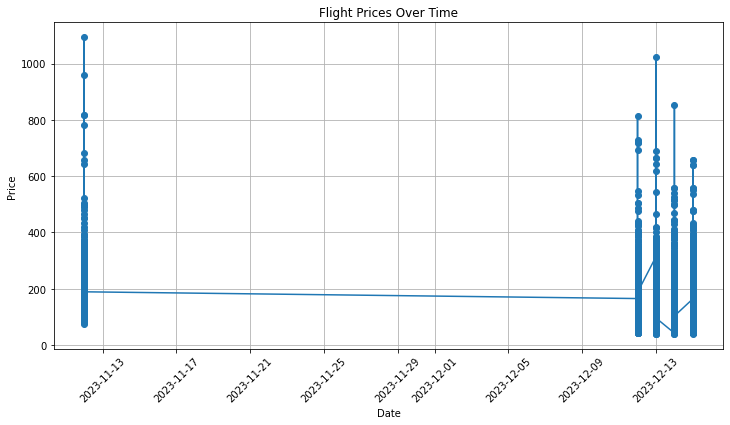

In [25]:
# Sort the DataFrame by 'Date'
df_sorted = df.sort_values(by='Date')

# Plotting the prices over time
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Date'], df_sorted['Price'], marker='o')
plt.title('Flight Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
output_file_path = r'C:\Users\eduma\OneDrive\Escritorio\Folders_Links\Formation\CTT COLLEGUE Programming Bootcamp Sept2023\StratThink_HDipData&AI_Sept23_HCI\CA 2 - GitLab\ca2stratthinking\cleaned_data.csv'
df.to_csv(output_file_path, index=False)